<a href="https://colab.research.google.com/github/lilythomson13/webscraping/blob/main/webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/fua?purveyor=owner#search=1~gallery~0~0'
#url='https://baltimore.craigslist.org/search/fua?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

In [3]:
from bs4 import BeautifulSoup as soup
bs0bj=soup(raw.content,'html.parser')
listings= bs0bj.find_all(class_="cl-static-search-result")

In [8]:
import re
furniture_type=["table", "tables", 'ottoman', 'desk', 'cabinets','chairs',
                'credenza','bedside','glasses','cups','dishes','spring','mattress',
                'cd player','ironing board','frame','dining table',
                'lamps','printer','tree','picture','cushions','rocker','bed','wine rack','art',
                'fixture','nightstands','rack','storage','hutch','recliners','stools','drawers','mirror']

data=[]
for i in range( len(listings) ):
  title = listings[i].find('div', class_='title').get_text().lower()
  price = listings[i].find('div',class_='price').get_text()
  link=listings[i].find(href=True)['href']
  #Get furniture type from title string:
  words=title.split()
  hits=[word for word in words if word in furniture_type]
  if len(hits) == 0:
    furniture_type= 'missing'
  else:
    furniture_type=hits[0]


    regex_search=re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None:
      year= np.nan
    else:
      year=regex_search.group(0)

    data.append({'title': title, 'price':price, 'year':year, 'link':link, 'furniture type': furniture_type})


In [9]:
df=pd.DataFrame.from_dict(data)
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=pd.to_numeric(df['price'], errors='coerce')
#df['year']=pd.to_numeric(df['year'],errors='coerce')
#df['age']=2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_furniture.csv')
df.head()
#I am having difficulty getting more than 7 or 8 rows of data even when I change from different cities. I think this might have to do with the
#amount of objects available on each page.
#I am moving forward with the steps for EDA though to complete this lab

(6, 5)


,title,price,year,link,furniture type
0,trundle bed in excellent condition,450,NaN,https://charlottesville.craigslist.org/fuo/d/c...,in
1,"pair of brass n glass cocktail table set 26"" d...",90,NaN,https://charlottesville.craigslist.org/fuo/d/k...,n
2,couch for sale in charlottesville,400,NaN,https://charlottesville.craigslist.org/fuo/d/c...,in
3,swivel glider recliner in leather,400,NaN,https://charlottesville.craigslist.org/fuo/d/q...,in
4,in a new york state of mind table,99,NaN,https://charlottesville.craigslist.org/fuo/d/c...,in


count      6.000000
mean     252.333333
std      181.104022
min       75.000000
25%       92.250000
50%      249.500000
75%      400.000000
max      450.000000
Name: price, dtype: float64


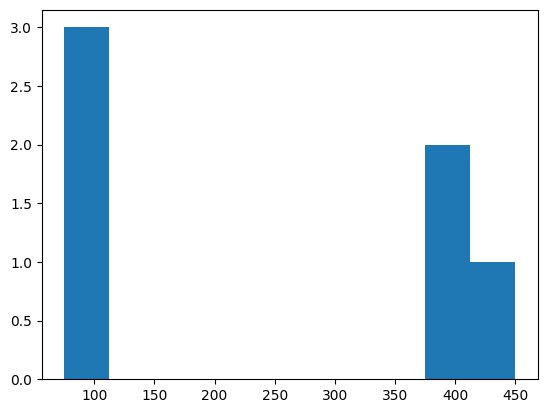

count                                      6
unique                                     6
top       trundle bed in excellent condition
freq                                       1
Name: title, dtype: object


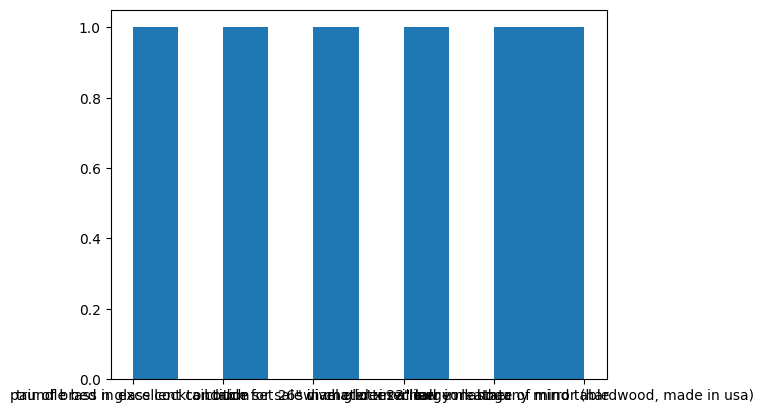

In [10]:

# EDA for price and title
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['title'].describe())
df['title'].hist(grid=False)
plt.show()

In [11]:

# Price by type:
df.loc[:,['price','furniture type']].groupby('furniture type').describe()

price                                                    
               count   mean         std   min   25%    50%    75%    max
furniture type                                                          
in               5.0  284.8  181.913991  75.0  99.0  400.0  400.0  450.0
n                1.0   90.0         NaN  90.0  90.0   90.0   90.0   90.0

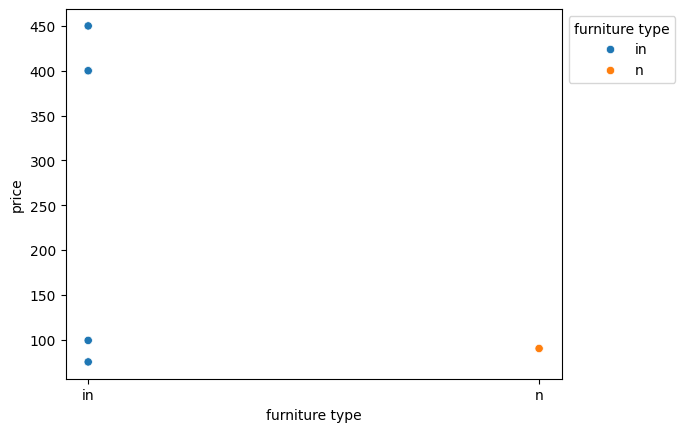

In [12]:

#Scatterplot of furniture type and price

ax = sns.scatterplot(data=df, x='furniture type', y='price',hue='furniture type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))